#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Read Data

In [2]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


#### EDA - Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [10]:
df['Operating Airline IATA Code'].isnull().value_counts()

False    18822
True        63
Name: Operating Airline IATA Code, dtype: int64

In [18]:
df = df.drop(['Operating Airline IATA Code', 'Published Airline IATA Code'], axis = 1)

In [19]:
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [20]:
df['Operating Airline'].equals(df['Published Airline'])

False

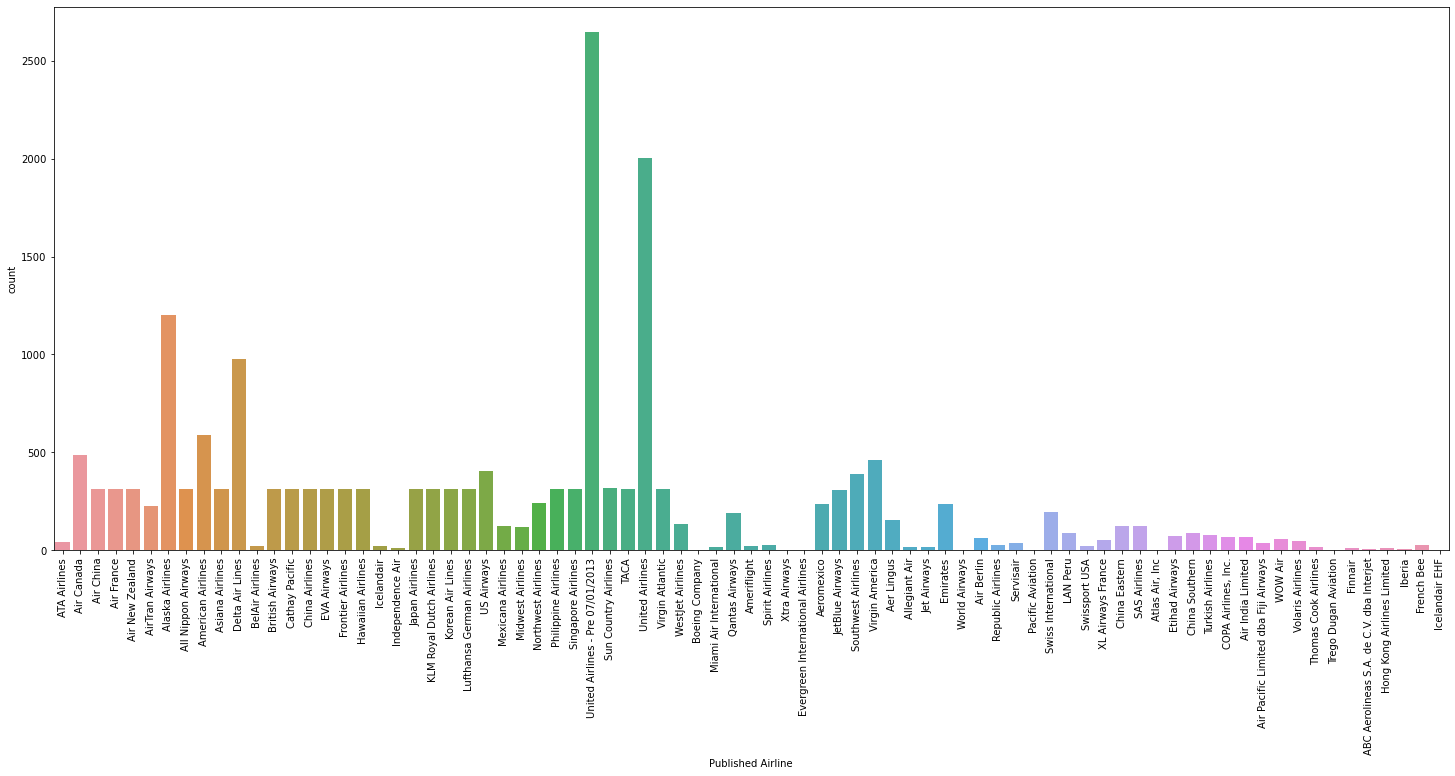

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(df['Published Airline'])
plt.xticks(rotation=90)

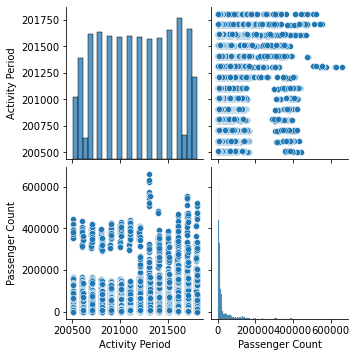

In [42]:
sns.pairplot(data=df);

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [49]:
def cluster(x,clusters):
    
    x=x
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        s_score=silhouette_score(x,pred)
        print('Number of cluster: {} , Score: {}'.format(i,s_score))
        allscore.append(s_score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='r');

In [43]:
x_airline=df[['Passenger Count','Published Airline']]

In [44]:
x_airline.head()

,Passenger Count,Published Airline
0,27271,ATA Airlines
1,29131,ATA Airlines
2,5415,ATA Airlines
3,35156,Air Canada
4,34090,Air Canada


In [50]:
x_airline=pd.get_dummies(x_airline,drop_first=True)
model=KMeans(n_clusters=4)
pred=model.fit_predict(x_airline)

x_airline['Cluster']=pred
x_airline.sample()

,Passenger Count,Published Airline_ATA Airlines,Published Airline_Aer Lingus,Published Airline_Aeromexico,Published Airline_Air Berlin,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air India Limited,Published Airline_Air New Zealand,...,Published Airline_United Airlines - Pre 07/01/2013,Published Airline_Virgin America,Published Airline_Virgin Atlantic,Published Airline_Volaris Airlines,Published Airline_WOW Air,Published Airline_WestJet Airlines,Published Airline_World Airways,Published Airline_XL Airways France,Published Airline_Xtra Airways,Cluster
14735,261477,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
silhouette_score(x_airline,pred)

0.786152663608912

Number of cluster: 2 , Score: 0.8596461993859419
Number of cluster: 3 , Score: 0.8285981425419636
Number of cluster: 4 , Score: 0.786152663608912
Number of cluster: 5 , Score: 0.7846348291175147
Number of cluster: 6 , Score: 0.66143439714093
Number of cluster: 7 , Score: 0.6619362150616054
Number of cluster: 8 , Score: 0.6493545087290001
Number of cluster: 9 , Score: 0.6406558284162539
Number of cluster: 10 , Score: 0.6127927892608064
Number of cluster: 11 , Score: 0.6111087460602922
Number of cluster: 12 , Score: 0.6110581823523283
Number of cluster: 13 , Score: 0.5323684128175676
Number of cluster: 14 , Score: 0.5324336638271324
Number of cluster: 15 , Score: 0.5317314959877562


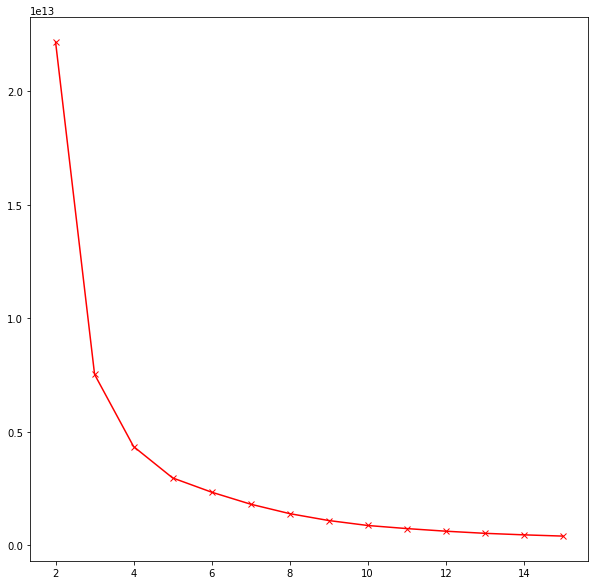

In [53]:
cluster(x_airline,15)

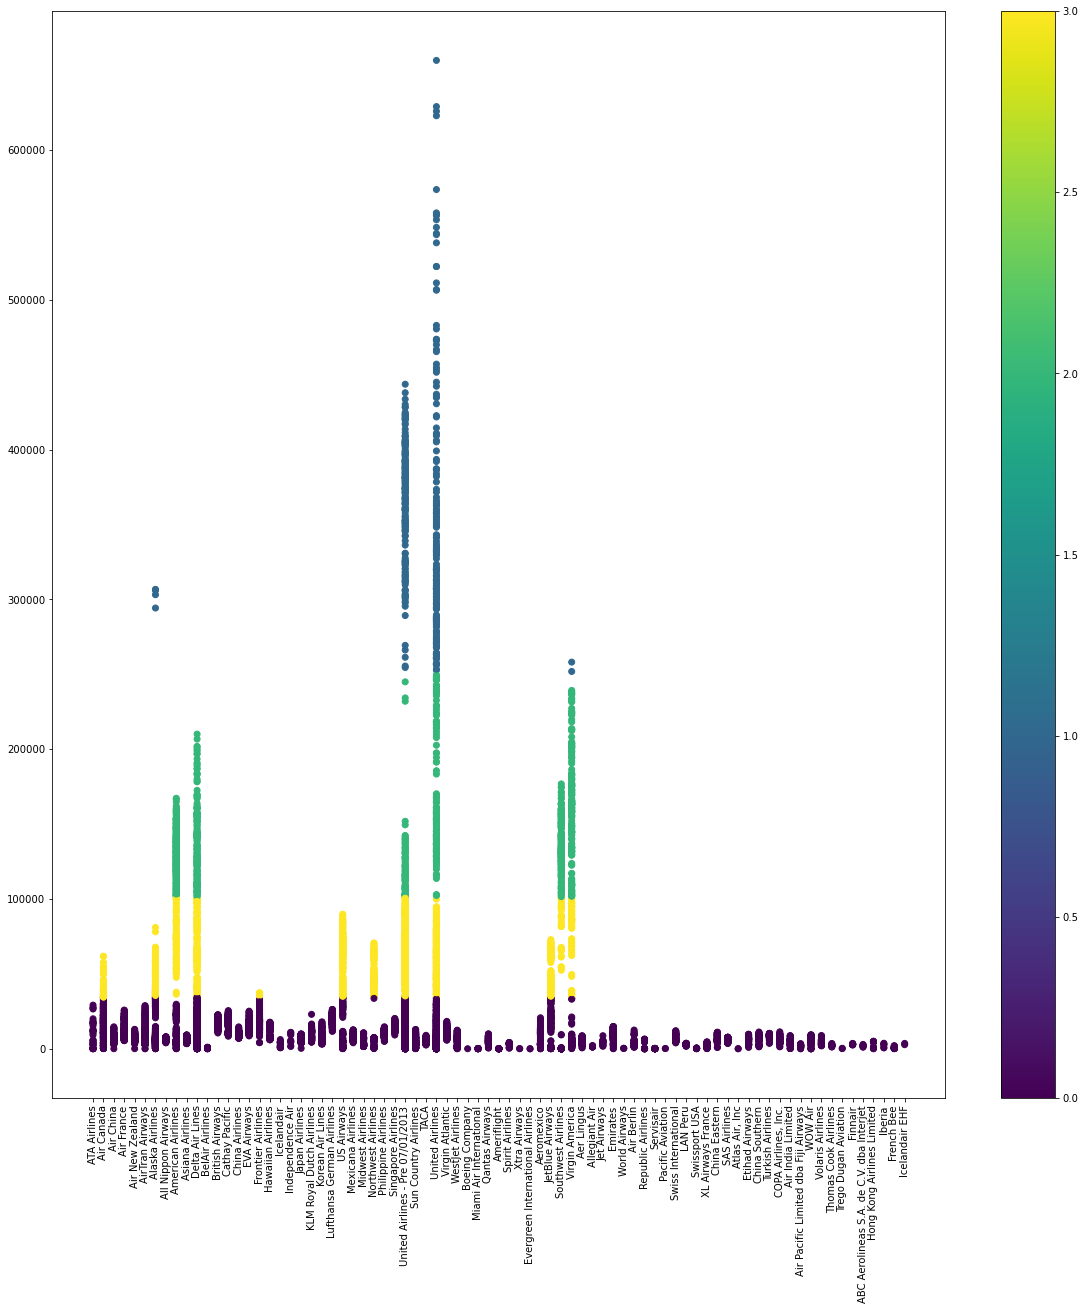

In [54]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Published Airline'],y=df['Passenger Count'],c=pred)
plt.xticks(rotation=90)
plt.colorbar()
plt.show();

In [55]:
x_period=df[['Activity Period','Operating Airline']]
x_period=pd.get_dummies(x_period,drop_first=True)
model2=KMeans(n_clusters=4)
pred2=model.fit_predict(x_period)

Number of cluster: 2 , Score: 0.6402142077019997
Number of cluster: 3 , Score: 0.6116894535574571
Number of cluster: 4 , Score: 0.6110615001367982
Number of cluster: 5 , Score: 0.6123131158979985
Number of cluster: 6 , Score: 0.6306568600183091
Number of cluster: 7 , Score: 0.6697548855738608
Number of cluster: 8 , Score: 0.6954891289006085
Number of cluster: 9 , Score: 0.7208382718616699
Number of cluster: 10 , Score: 0.7410772505904981


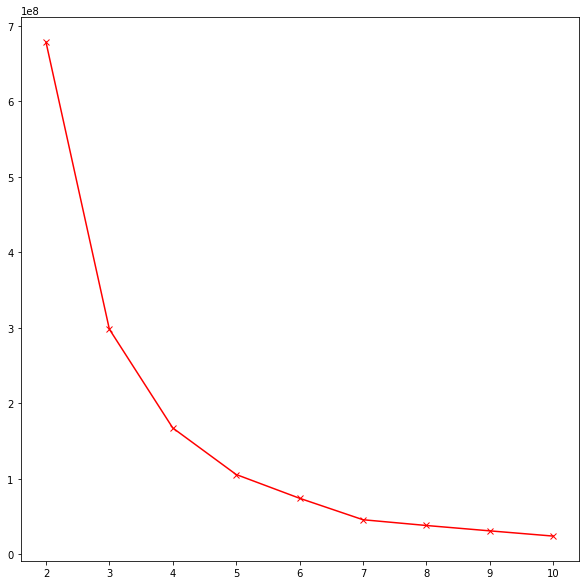

In [61]:
cluster(x_period,10)

In [57]:
silhouette_score(x_period,pred2)

0.6110489630845438

In [59]:
x_period['Cluster']=pred2
x_period.sample(20)

,Activity Period,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Cluster
13062,201412,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9982,201208,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
7086,201007,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
13106,201412,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
10629,201302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12121,201403,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
16136,201612,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8139,201105,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
10380,201212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
14806,201602,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


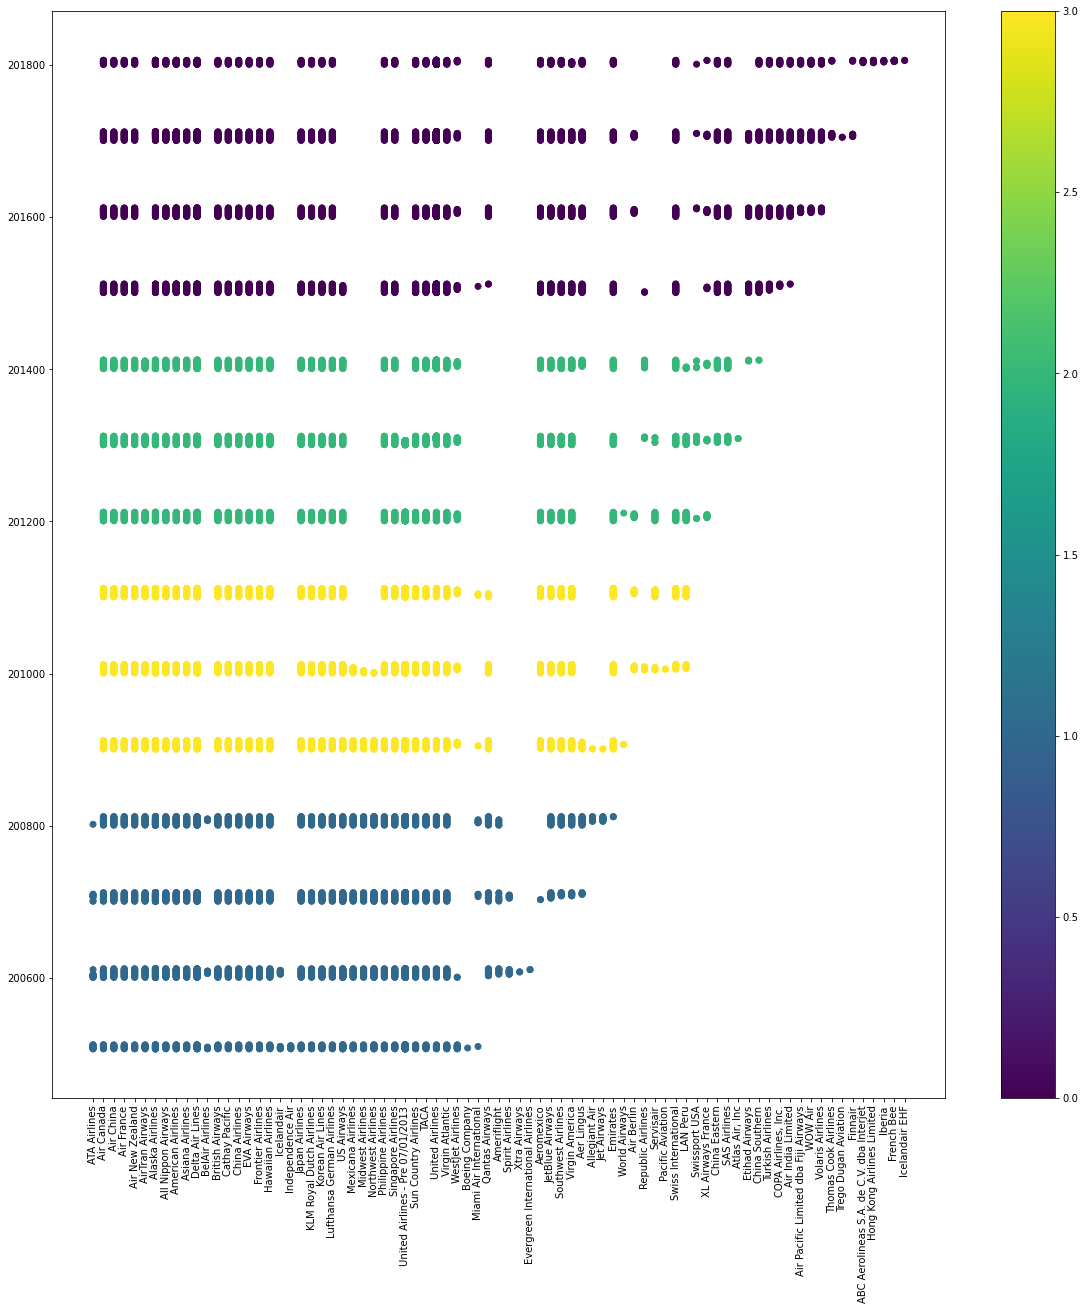

In [60]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Published Airline'],y=df['Activity Period'],c=pred2)
plt.colorbar()
plt.xticks(rotation=90)
plt.show();

In [63]:
x_passenger=df[['Passenger Count','GEO Region']]
x_passenger=pd.get_dummies(x_passenger,drop_first=True)

model3=KMeans(n_clusters=4)
pred3=model.fit_predict(x_passenger)
silhouette_score(x_passenger,pred3)

0.7861526691182983

Number of cluster: 2 , Score: 0.8596462008293775
Number of cluster: 3 , Score: 0.8285981454141327
Number of cluster: 4 , Score: 0.7861526691182983
Number of cluster: 5 , Score: 0.7846348349004543
Number of cluster: 6 , Score: 0.6609160836360591
Number of cluster: 7 , Score: 0.6637330458717603
Number of cluster: 8 , Score: 0.6445410077977999
Number of cluster: 9 , Score: 0.6411792079718482
Number of cluster: 10 , Score: 0.6147026126896246
Number of cluster: 11 , Score: 0.6109718380176979
Number of cluster: 12 , Score: 0.6105233856401869
Number of cluster: 13 , Score: 0.5324098864928136
Number of cluster: 14 , Score: 0.5325785052725714
Number of cluster: 15 , Score: 0.5317963055477896


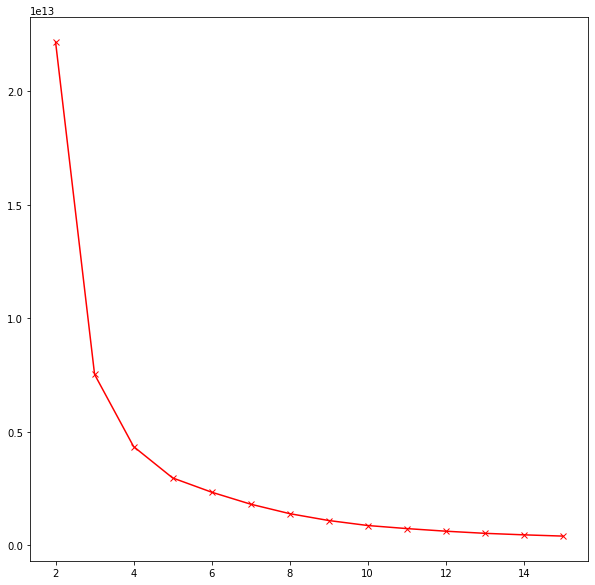

In [65]:
cluster(x_passenger,15)

In [67]:
x_passenger['Cluster']=pred3
x_passenger.sample(10)

,Passenger Count,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Cluster
5010,10724,0,1,0,0,0,0,0,0,0
11754,6330,0,0,0,0,0,0,0,0,0
75,7262,0,0,0,0,0,0,0,1,0
297,3986,0,0,0,0,1,0,0,0,0
16637,15832,0,0,0,1,0,0,0,0,0
5729,36462,0,1,0,0,0,0,0,0,3
2518,25673,0,1,0,0,0,0,0,0,0
437,38737,0,0,0,0,0,0,0,1,3
7415,137622,0,0,0,0,0,0,0,1,1
7744,15392,0,0,0,0,0,0,0,0,0


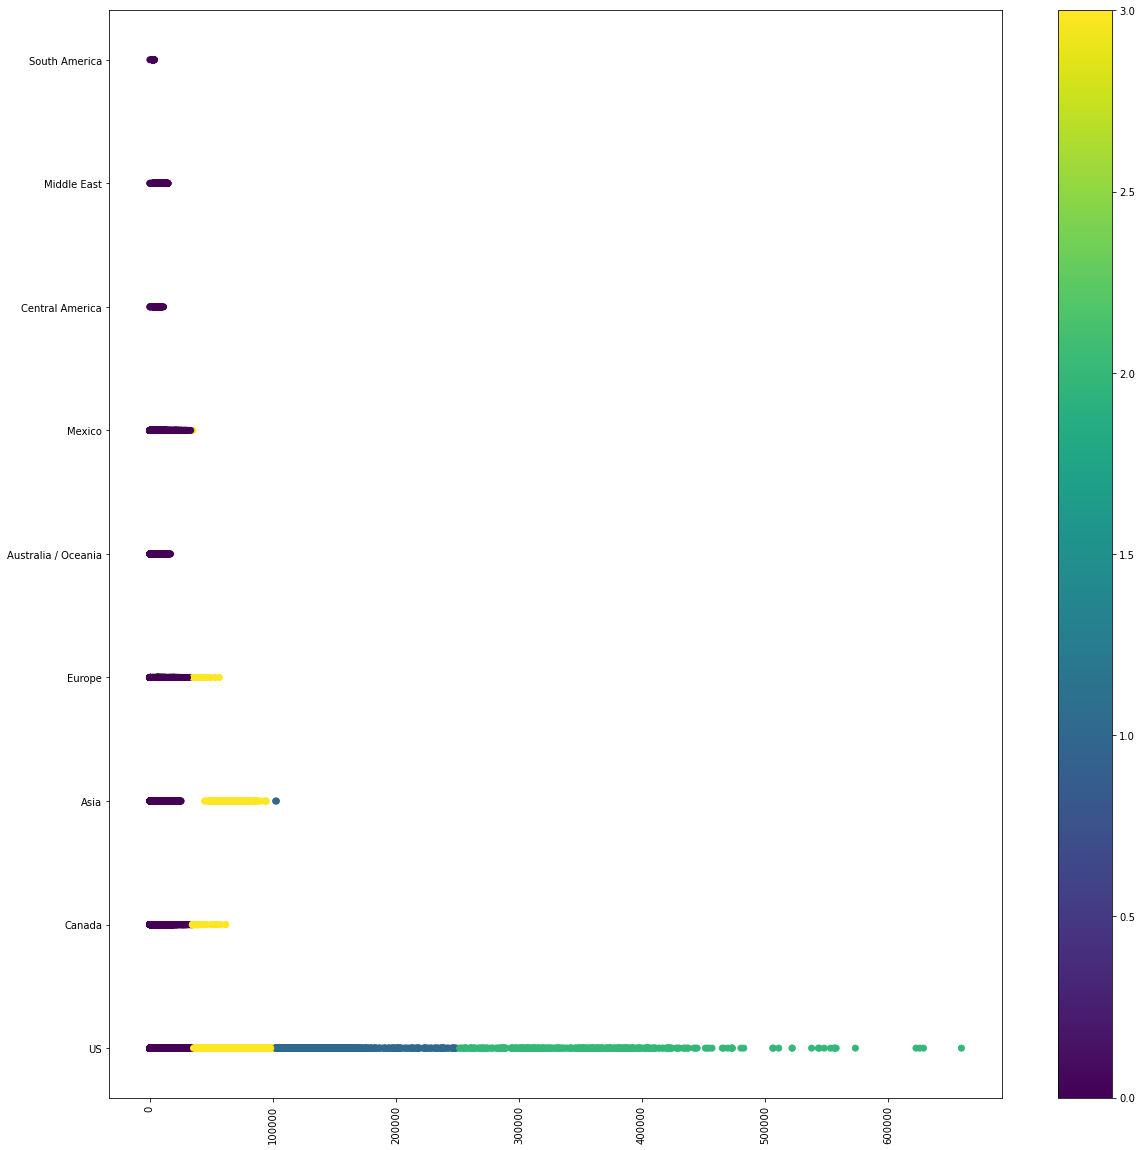

In [68]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Passenger Count'],y=df['GEO Region'],c=pred3)
plt.colorbar()
plt.xticks(rotation=90)
plt.show();